# Проект по определению сердечно-сосудистых заболеваний 

In [7]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings

In [8]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df_train = pd.read_csv(r'C:\Users\pulka\train.csv')
df_test = pd.read_csv(r'C:\Users\pulka\test.csv')


In [10]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


None

In [11]:
display(df_train.head())
display(df_test.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [6]:
df_train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Возраст 

In [8]:
df_train['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [9]:
df_train['age'] = (df_train['age']/365)
df_train['age'] = df_train['age'].round()

In [10]:
df_train['age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age, Length: 70000, dtype: float64

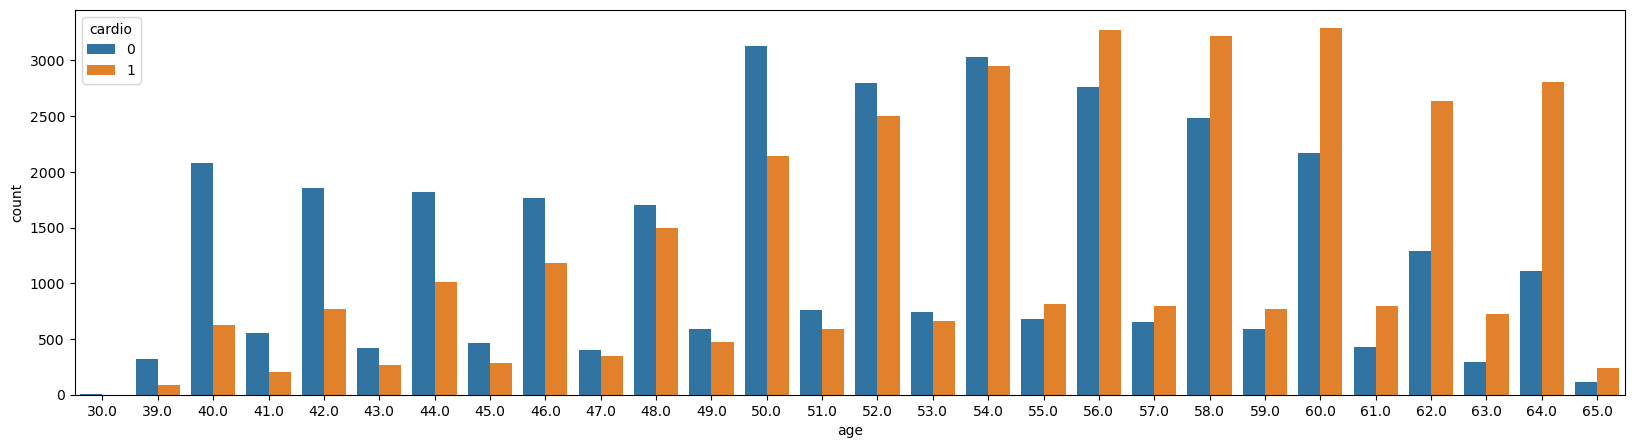

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(data = df_train, x= df_train['age'], hue = df_train['cardio']);

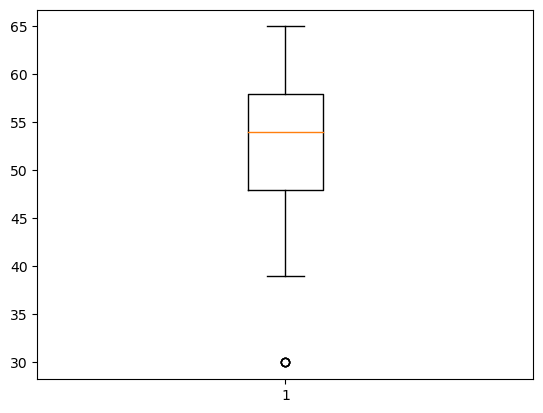

In [12]:
plt.boxplot(df_train['age']);

### Пол

In [13]:
df_train.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

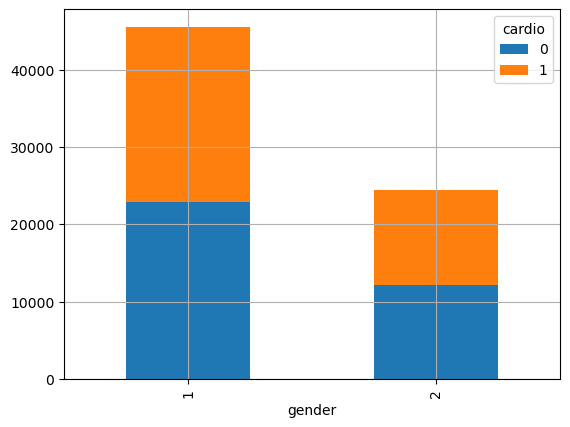

In [14]:
pd.crosstab(df_train['gender'], df_train['cardio']).plot(kind = 'bar', stacked = 'true',grid = 'True' );

### Рост

In [15]:
df_train.height

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 70000, dtype: int64

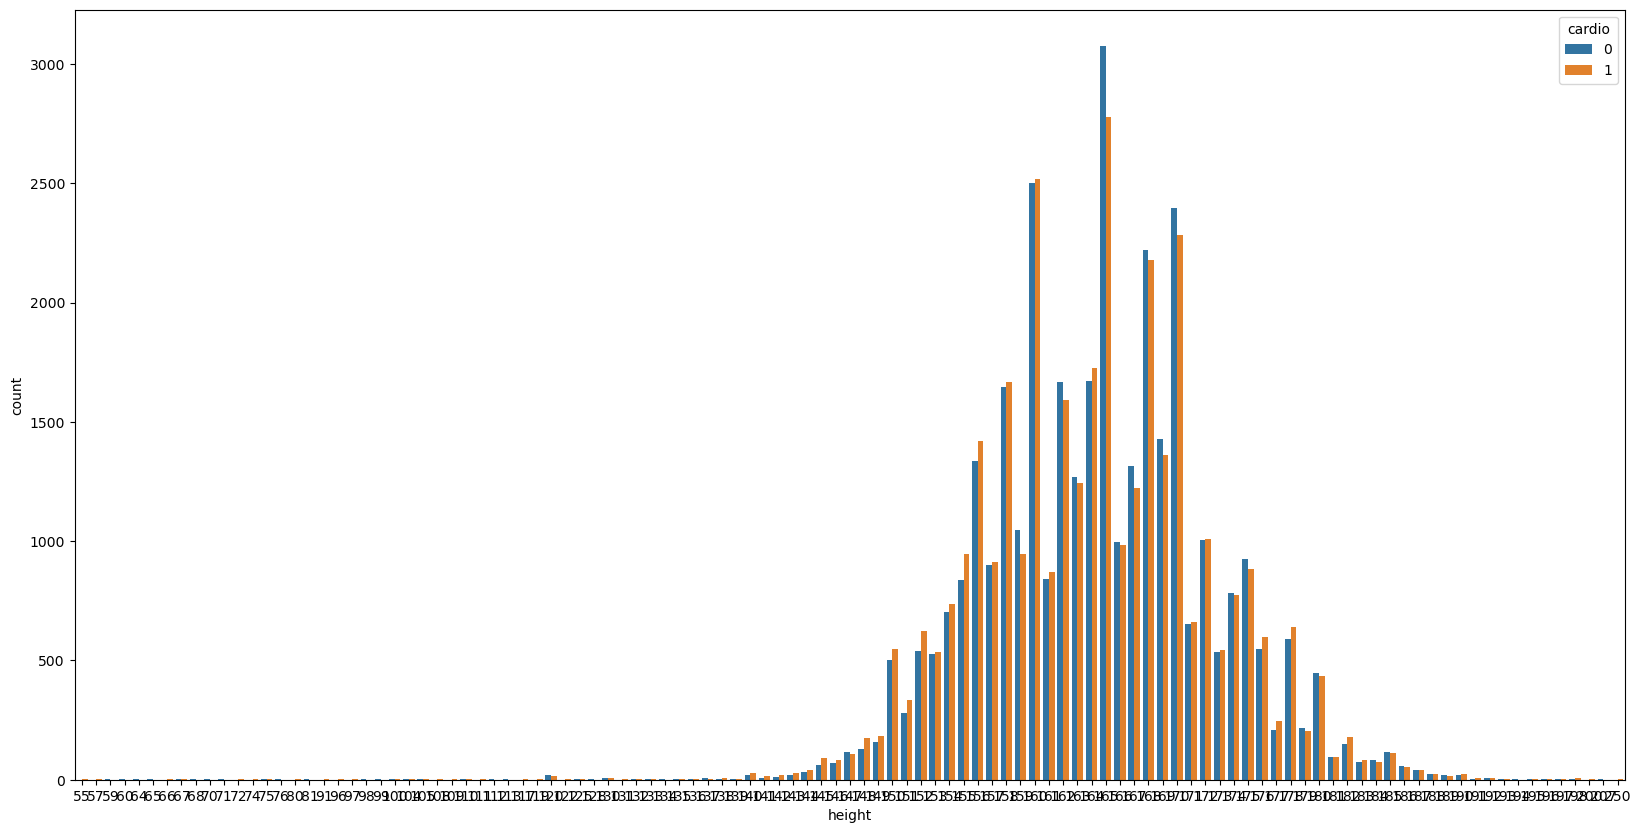

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_train, x= df_train['height'], hue = df_train['cardio']);

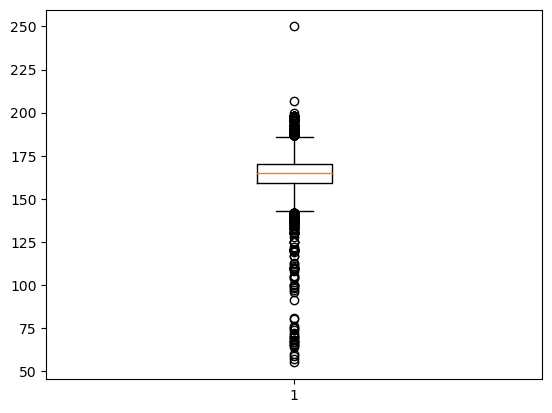

In [17]:
plt.boxplot(df_train['height']);

In [18]:
q1 = df_train['height'].quantile(0.25)
q3 = df_train['height'].quantile(0.75)
max_lim = q3 + 1.5 * (q3 - q1)
min_lim = q1 - 1.5 * (q3 - q1)
print(f'q1={q1}\nq3={q3}\nmax={max_lim}\nmin={min_lim}')

q1=159.0
q3=170.0
max=186.5
min=142.5


In [19]:
print(df_train.loc[df_train['height'] <142].shape[0])
print(df_train.loc[df_train['height'] >190].shape[0])


221
64


In [20]:
(221+64)/70000

0.004071428571428571

In [21]:
df_train = df_train.loc[df_train['height'].between(142, 186)]

In [22]:
df_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


### Вес

In [23]:
df_train.weight.value_counts()

65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: weight, Length: 287, dtype: int64

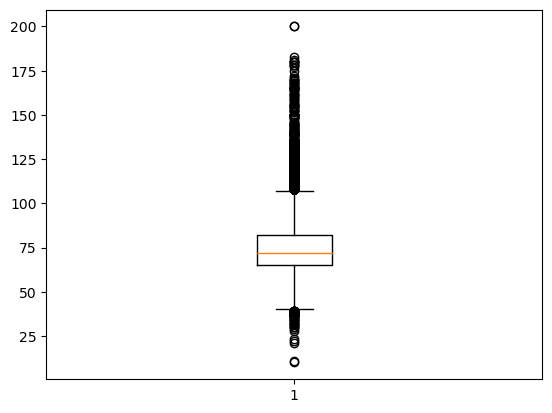

In [24]:
plt.boxplot(df_train['weight']);

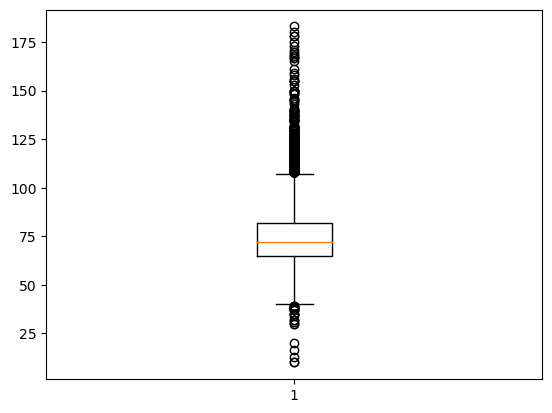

In [25]:
plt.boxplot(df_test['weight']);

In [26]:
q1 = df_train['weight'].quantile(0.25)
print(q1)

65.0


In [27]:
q3 = df_train['weight'].quantile(0.75)
print(q3)

82.0


In [28]:
max = q3 + 1.5*(q3 - q1)
print(max)

107.5


In [29]:
min = q1 - 1.5*(q3 - q1)
print(min)

39.5


In [30]:
df_train.loc[(df_train['weight'] >105) ]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
15,24,46.0,2,172,112.0,120,80,1,1,0,0,0,1
46,61,50.0,1,162,107.0,150,90,2,1,0,0,1,1
62,81,56.0,2,187,115.0,130,90,1,1,0,1,1,0
83,114,54.0,1,152,110.0,160,90,1,1,0,0,1,1
196,267,62.0,1,176,108.0,140,90,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,99799,54.0,2,188,108.0,130,80,2,2,0,1,0,1
69946,99925,58.0,1,164,115.0,130,80,1,1,0,0,1,1
69947,99930,64.0,2,172,113.0,110,80,1,1,0,0,0,1
69981,99972,48.0,2,182,110.0,130,90,2,2,0,0,1,1


### Давление

In [31]:
list(df_train.ap_hi.unique())

[110,
 140,
 130,
 150,
 100,
 120,
 145,
 170,
 135,
 125,
 90,
 180,
 160,
 133,
 190,
 80,
 122,
 169,
 126,
 158,
 200,
 14,
 123,
 70,
 161,
 147,
 115,
 137,
 153,
 11,
 148,
 105,
 220,
 119,
 141,
 165,
 164,
 12,
 124,
 172,
 902,
 162,
 906,
 117,
 134,
 166,
 210,
 176,
 116,
 10,
 121,
 16,
 112,
 159,
 113,
 118,
 155,
 142,
 131,
 157,
 136,
 146,
 138,
 -100,
 909,
 109,
 85,
 106,
 129,
 93,
 7,
 95,
 179,
 156,
 168,
 132,
 104,
 103,
 178,
 175,
 128,
 151,
 15,
 139,
 11500,
 127,
 17,
 108,
 144,
 102,
 1,
 1420,
 13,
 143,
 701,
 107,
 184,
 149,
 167,
 114,
 101,
 60,
 1500,
 181,
 171,
 202,
 -115,
 111,
 907,
 20,
 188,
 185,
 163,
 173,
 154,
 177,
 -140,
 174,
 -120,
 14020,
 1400,
 240,
 191,
 197,
 1620,
 152,
 96,
 199,
 -150,
 1130,
 193,
 99,
 196,
 309,
 401,
 16020,
 1202,
 806,
 1300,
 230,
 207,
 215,
 97,
 1409,
 11020,
 24,
 960,
 13010,
 1110,
 195,
 1205,
 187,
 2000]

In [32]:
def press(a):
    if a > 999 and a< 9999:
        a = a//10
    elif a > 9999:
        a = a//10
    return a

In [33]:
df_train['ap_hi'] = df_train['ap_hi'].apply(press)
df_train['ap_hi'] = df_train['ap_hi'].apply(abs)

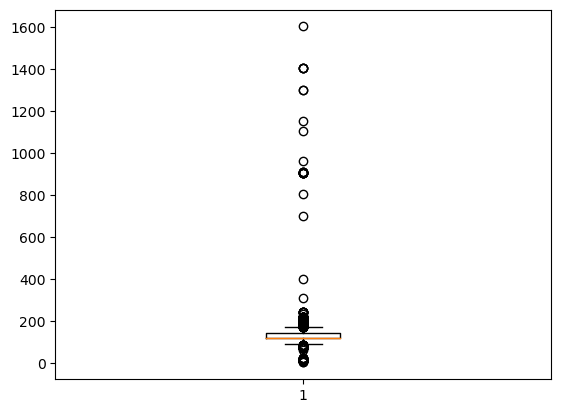

In [34]:
plt.boxplot(df_train['ap_hi']);

In [35]:
q1= df_train['ap_hi'].quantile(0.25)
print(q1)

120.0


In [36]:
q3= df_train['ap_hi'].quantile(0.75)
print(q3)

140.0


In [37]:
max = q3 + 1.5*(q3-q1)
print(max)

170.0


In [38]:
min = q1 - 1.5*(q3-q1)
print(min)

90.0


In [39]:
df_train = df_train.loc[df_train['ap_hi'] < 300]

In [40]:
df_train.loc[df_train['ap_hi'].between(min, max)].shape[0]

68586

### Пульс

In [41]:
df_train.ap_lo.value_counts()

80     34840
90     14313
70     10243
100     4082
60      2722
       ...  
56         1
182        1
810        1
9          1
602        1
Name: ap_lo, Length: 157, dtype: int64

In [42]:
list(df_train.ap_lo.unique())

[80,
 90,
 70,
 100,
 60,
 85,
 89,
 110,
 65,
 63,
 79,
 1100,
 1000,
 800,
 120,
 50,
 30,
 109,
 84,
 1033,
 150,
 91,
 40,
 73,
 78,
 75,
 86,
 87,
 1001,
 82,
 95,
 69,
 74,
 97,
 81,
 1200,
 83,
 119,
 93,
 105,
 10000,
 99,
 77,
 59,
 8044,
 140,
 92,
 1044,
 108,
 125,
 115,
 68,
 61,
 106,
 102,
 94,
 66,
 52,
 170,
 76,
 160,
 62,
 96,
 130,
 113,
 67,
 9100,
 10,
 88,
 902,
 8,
 112,
 104,
 71,
 72,
 1008,
 98,
 2088,
 20,
 802,
 8000,
 1022,
 850,
 708,
 57,
 101,
 9011,
 1011,
 64,
 0,
 1007,
 1177,
 7100,
 45,
 709,
 8500,
 58,
 1110,
 8099,
 1088,
 126,
 1077,
 1120,
 7,
 103,
 1125,
 180,
 121,
 8100,
 710,
 5700,
 8079,
 1111,
 1003,
 6,
 1900,
 809,
 114,
 801,
 1002,
 53,
 111,
 1,
 118,
 56,
 182,
 810,
 9,
 7099,
 11000,
 9800,
 8200,
 1139,
 107,
 820,
 55,
 1400,
 190,
 900,
 122,
 6800,
 135,
 700,
 15,
 1101,
 910,
 1140,
 1211,
 -70,
 54,
 8077,
 901,
 880,
 870,
 585,
 49,
 602]

In [43]:
df_train['ap_lo'] = df_train['ap_lo'].apply(press)
df_train['ap_lo'] = df_train['ap_lo'].apply(abs)

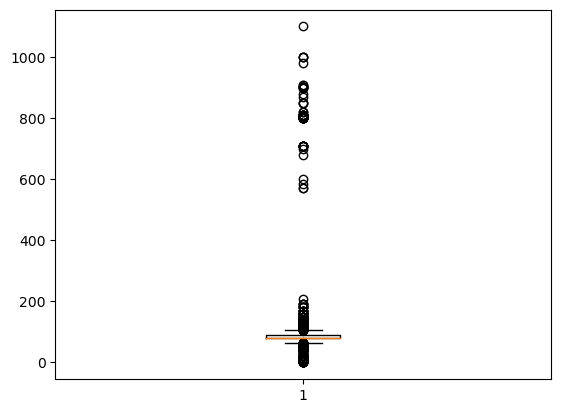

In [44]:
plt.boxplot(df_train['ap_lo']);

In [45]:
q1= df_train['ap_lo'].quantile(0.25)
print(q1)

80.0


In [46]:
q3= df_train['ap_lo'].quantile(0.75)
print(q3)

90.0


In [47]:
max = q3 + 1.5*(q3-q1)
print(max)

105.0


In [48]:
min = q1 - 1.5*(q3-q1)
print(min)

65.0


In [49]:
df_train = df_train.loc[df_train['ap_lo'] < 200]

### Уровень халестерина

In [50]:
df_train.cholesterol.value_counts()

1    52326
2     9533
3     8059
Name: cholesterol, dtype: int64

### Уровень сахара

In [51]:
df_train.gluc.value_counts()

1    59413
3     5324
2     5181
Name: gluc, dtype: int64

### Курение

In [52]:
df_train.smoke.value_counts()

0    63755
1     6163
Name: smoke, dtype: int64

### Употребление алкоголя

In [53]:
df_train.alco.value_counts()

0    66160
1     3758
Name: alco, dtype: int64

### Физическая активность

In [54]:
df_train.active.value_counts()

1    56193
0    13725
Name: active, dtype: int64

In [55]:
df_train.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

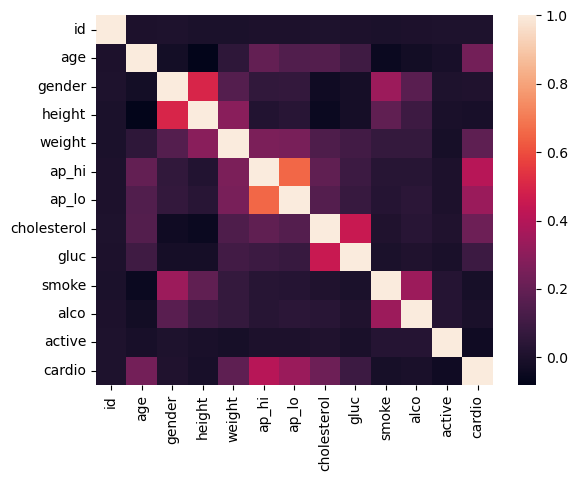

In [56]:
sns.heatmap(df_train.corr());

In [57]:
#sns.pairplot(df_train, hue = 'cardio');

In [58]:
df_train.shape

(69918, 13)

In [59]:
(70000-69437)/70000

0.008042857142857143

In [60]:
df_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<AxesSubplot: >

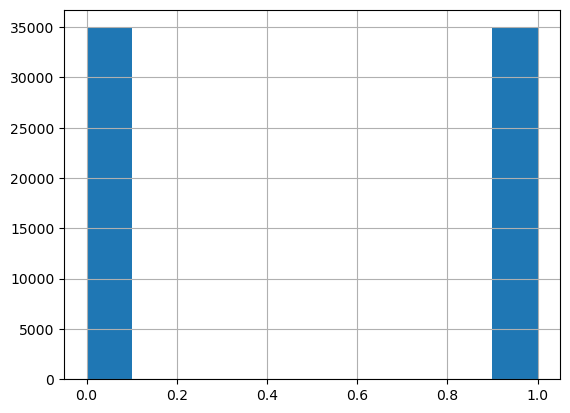

In [61]:
df_train['cardio'].hist()

In [62]:
df_train['cardio'].value_counts()

0    34980
1    34938
Name: cardio, dtype: int64